SPHEREx Machine Learning Project V1
Last Edited 12/22/2024
@marcoc7 @james buda 

In [1]:
import os
import numpy as np


In [2]:
import sys
from pathlib import Path

base_dir = Path.cwd()

autolens_config_path = base_dir / "autolens_config"
spherex_path = base_dir / "SPHEREx"

sys.path.append(str(autolens_config_path))
sys.path.append(str(spherex_path))


#import gcluster10  # from autolens
import SPHERExScripts as SPHEREx  # from SPHEREX
import gcluster10 as galaxy

In [3]:
def calculate_original_image_pixels(sphereX_pixels, resolution_ratio=9, psf_length=54):
    """
    Calculate the required original image pixel dimensions based on SPHEREx pixel size.

    """
    return sphereX_pixels * resolution_ratio + 2 * psf_length - 1

sphereX_pixels_list = [16,32,64,128, 256, 512, 1024,2048]
original_image_sizes = {px: calculate_original_image_pixels(px) for px in sphereX_pixels_list}
for px, orig in original_image_sizes.items():
    print(f"SPHEREx Pixels: {px}, Original Image Pixels: {orig}")


SPHEREx Pixels: 16, Original Image Pixels: 251
SPHEREx Pixels: 32, Original Image Pixels: 395
SPHEREx Pixels: 64, Original Image Pixels: 683
SPHEREx Pixels: 128, Original Image Pixels: 1259
SPHEREx Pixels: 256, Original Image Pixels: 2411
SPHEREx Pixels: 512, Original Image Pixels: 4715
SPHEREx Pixels: 1024, Original Image Pixels: 9323
SPHEREx Pixels: 2048, Original Image Pixels: 18539


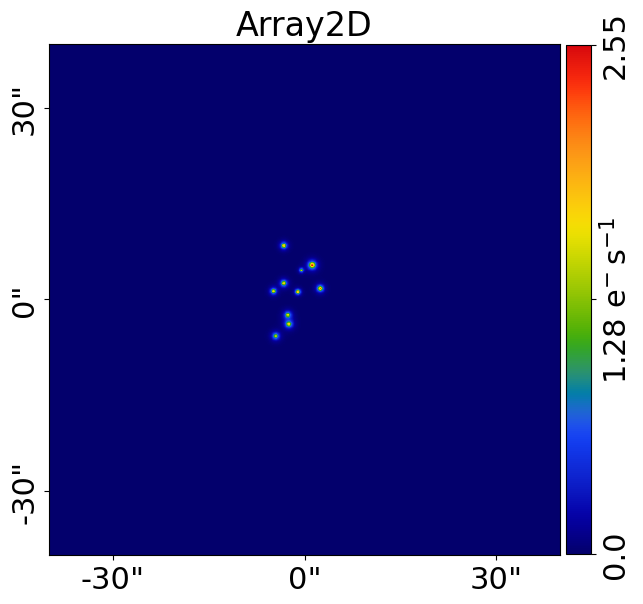

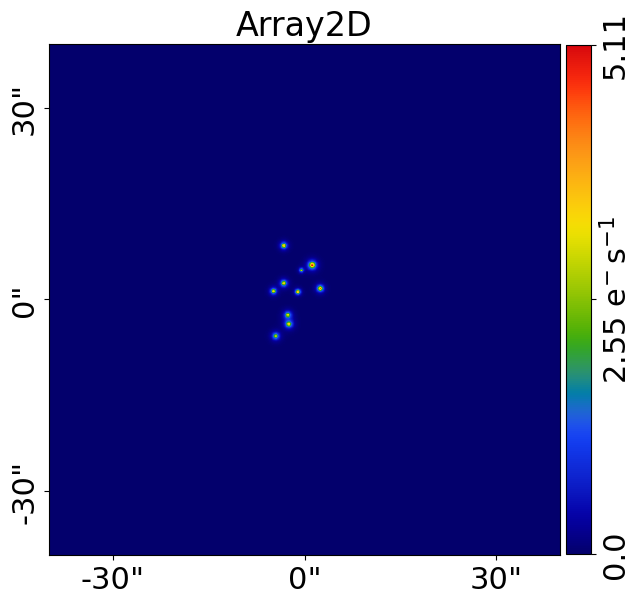

In [18]:
raw = (galaxy.wrapperFunction()).native

In [19]:
convolved, binned = SPHEREx.processImg(raw)


In [9]:
def plotImg(raw_image, convolved=None, binned=None, verbosity=1):
    """
    Plots the raw image, and optionally the convolved and binned images, with verbosity levels.
    
    Parameters:
    - raw_image (2D array): Raw image to plot.
    - convolved (2D array, optional): Convolved image to plot. Default is None.
    - binned (2D array, optional): Binned image to plot. Default is None.
    - verbosity (int, optional): Level of detail to include in the plot. Default is 1.
      - 0: Just the images.
      - 1: Add main title and subtitles for each plot.
      - 2: Include individual color bars.
      - 3: Include axes with labels.
    """
    images = [raw_image, convolved, binned]
    titles = ["Raw Image", "Convolved Image", 'Binned Image (3.1"/pix)']

    # Filter out None images
    valid_images = [(img, title) for img, title in zip(images, titles) if img is not None]

    fig, axes = plt.subplots(1, len(valid_images), figsize=(6 * len(valid_images), 6))

    if len(valid_images) == 1:
        axes = [axes]

    for i, (ax, (img, title)) in enumerate(zip(axes, valid_images)):
        im = ax.imshow(img, cmap='inferno')
        if verbosity >= 1:
            ax.set_title(title, fontsize=14)
        if verbosity >= 2:
            cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            cbar.set_label("Intensity", fontsize=10)
        if verbosity >= 3:
            # Include axes
            ax.set_xlabel('X-axis (pixels)')
            ax.set_ylabel('Y-axis (pixels)')
        else:
            ax.axis('off')  

    if verbosity >= 1:
        fig.suptitle("SPHEREx Image Visualization", fontsize=16, y=1.02)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95]) #Prob should adjust later tbh
    plt.show()

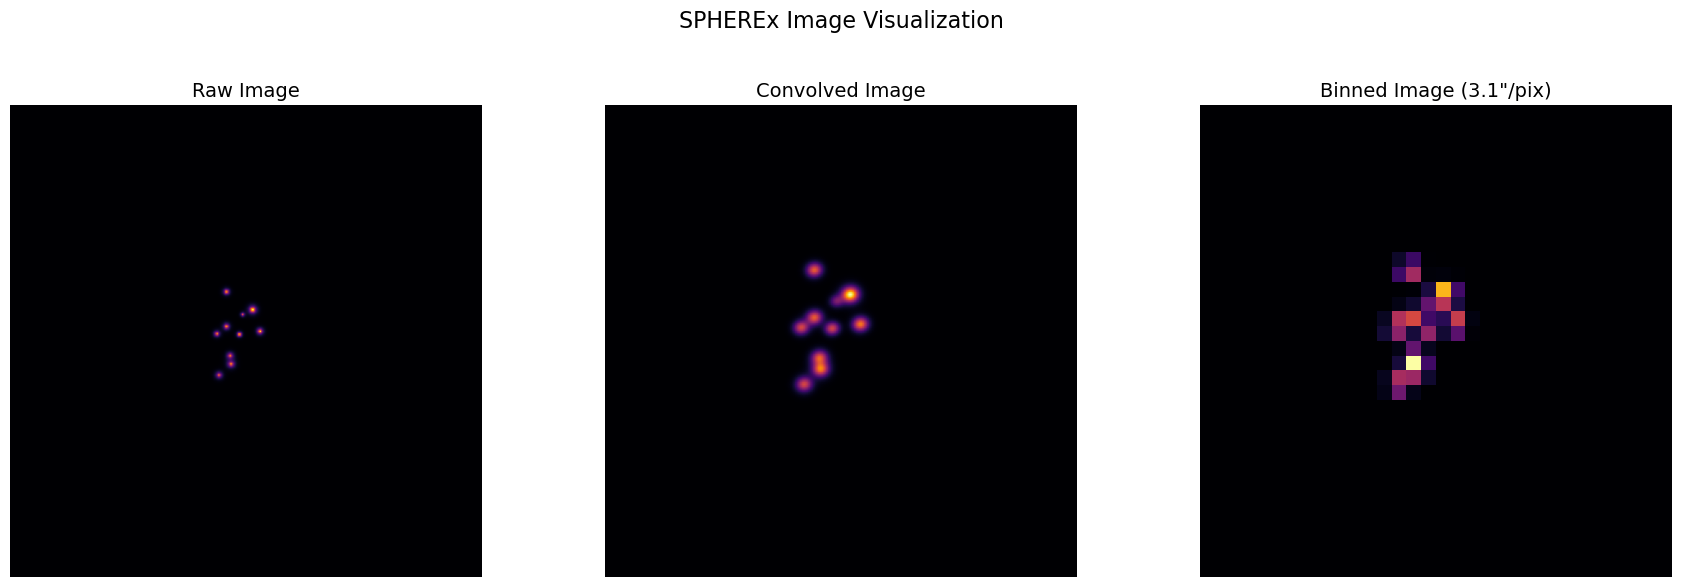

In [20]:
import matplotlib.pyplot as plt
plotImg(raw,convolved,binned,)

In [11]:
raw_flux = raw.sum()
binned_flux = binned.sum()
print(f"Raw Flux: {raw_flux}, Binned Flux: {binned_flux}")


Raw Flux: 755.4836096798352, Binned Flux: 9.326958144195494


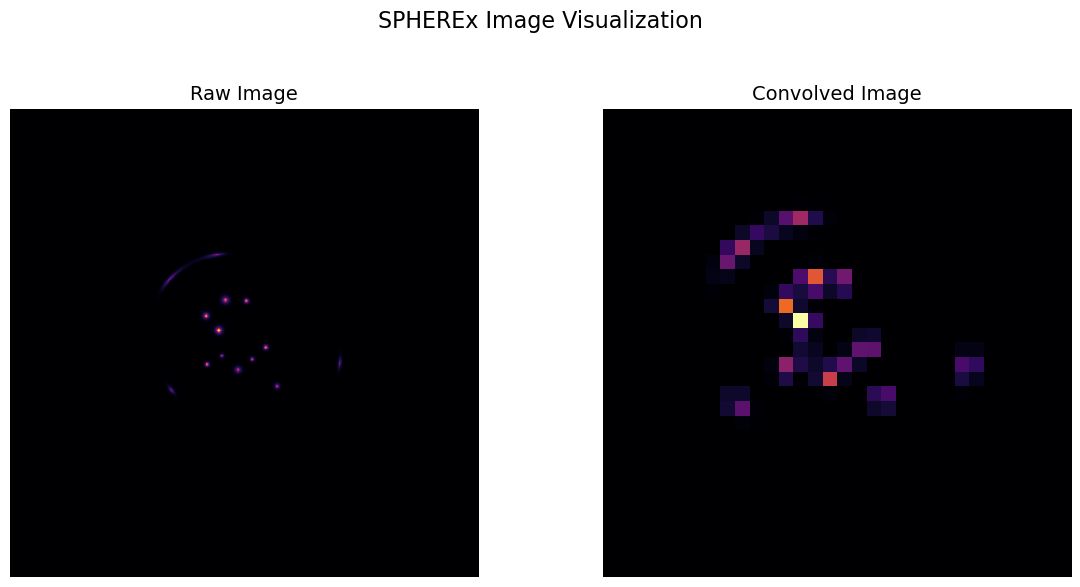

In [12]:
plotImg(raw,binned)

Data ProcessingStuff: 

In [4]:
# Load the arrays from the .npz file
arrays = np.load("results_arrays.npz")

# Access a specific array by its key
raw_array_0 = arrays["raw_array_0"]
spherex_array_0 = arrays["spherex_array_0"]

print(raw_array_0.shape)  # Check the shape of the array


(395, 395)


Available keys: KeysView(NpzFile 'results_arrays.npz' with keys: raw_array_0, raw_array_1, raw_array_2, raw_array_3, raw_array_4...)


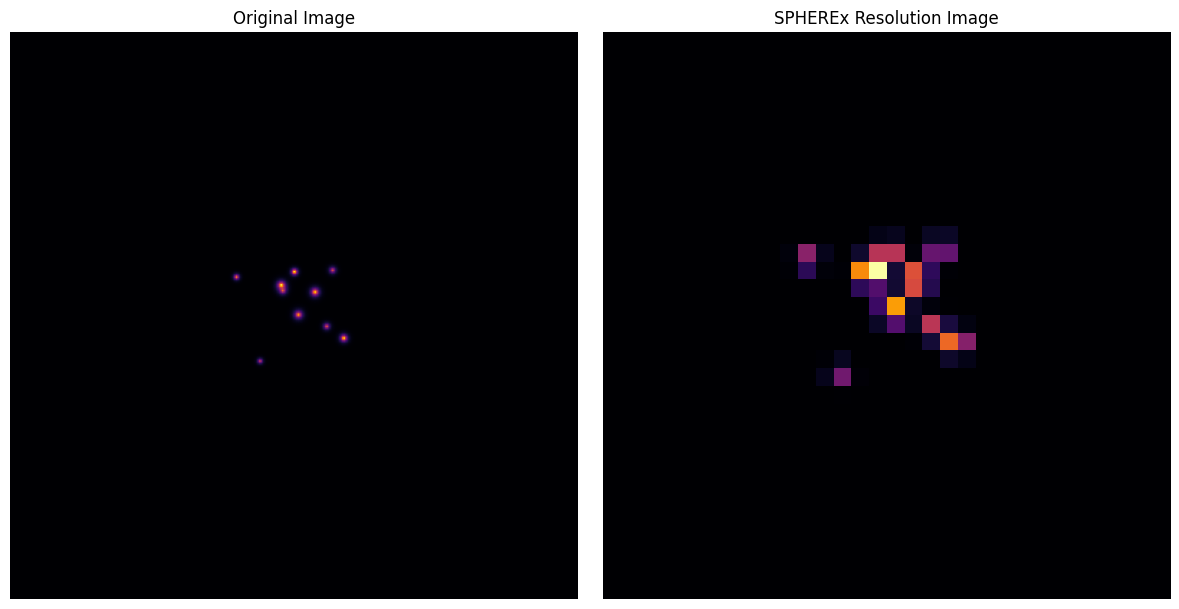

In [5]:
import numpy as np
import matplotlib.pyplot as plt

array_file = "results_arrays.npz"
arrays = np.load(array_file)

print("Available keys:", arrays.keys())

index_to_plot = 4
raw_key = f"raw_array_{index_to_plot}"
spherex_key = f"spherex_array_{index_to_plot}"

raw_array = arrays[raw_key]
spherex_array = arrays[spherex_key]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(raw_array, cmap="inferno")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(spherex_array, cmap="inferno")
axes[1].set_title("SPHEREx Resolution Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()
